Order of growth for BFS is O(|V| + |E|) where |V| is the number of vertices and |E| is the number of eges.  This means the order of BFS grows in proportion to whichever is bigger.

This is due to there being four operations in a BFS:
* adding a vertex to the queue: cost is in O(|V|)
* removing a vertex from the queue: cost is in O(|V|)
* marking a vertex as visited: cost is in O(|V|)
* checking whether a vertex is marked: cost is in O(|E|)

In a regular graph, the number of edges is in O(|V|).  In a complete graph, the number of edges is in $O(|V|^2)$

##FIFO implementation

a FIFO provides the folloing operations:
* append - add a new item to the end of the queue
* pop - remove and return the item at the front of the queue

##Exercise 4.1

In [33]:
import GraphWorld as GW
def show_graph(g, layout='Circle'):
    if layout=="Circle":
        l = GW.CircleLayout(g)
    gw = GW.GraphWorld()
    gw.show_graph(g, l)
    gw.mainloop()
def ShowGraph(g, layout='Circle'):
    if layout=="Circle":
        l = GW.CircleLayout(g)
    gw = GW.GraphWorld()
    gw.show_graph(g, l)
    gw.mainloop()

In [2]:
from Graph import *

class LinkedList(Graph):
    
    def __init__(self):
        Graph.__init__(self)
        start = Vertex('start')
        self.start = start
        self.add_vertex(self.start)
        
        end = Vertex('end')
        self.end = end
        self.add_vertex(self.end)
        
        self.add_edge(Edge(start, end))
        
    def append(self, value):
        
        #remove last edge
        end = self.end
        last = self.out_vertices(end)[0]
        last_edge = self.get_edge(last, end)
        self.remove_edge(last_edge)
        
        #add edges from new value to last and end
        v = Vertex(value)
        self.add_vertex(v)
        self.add_edge(Edge(v, last))
        self.add_edge(Edge(v, end))
        
    def pop(self):
        
        #remove first edge
        start = self.start
        first = self.out_vertices(start)[0]
        first_edge = self.get_edge(first, start)
        self.remove_edge(first_edge)
        
        #remove second edge
        second = self.out_vertices(first)[0]
        second_edge = self.get_edge(first, second)
        self.remove_edge(second_edge)
        
        #connect start to second
        self.add_edge(Edge(start, second))
        
        return first     

In [3]:
LL = LinkedList()
for i in xrange(10):
    LL.append(i)
show_graph(LL)

In [4]:
for i in xrange(5):
    pop = LL.pop()
show_graph(LL)
print pop

Vertex(4)


In [5]:
class CircularBuffer(Graph):
    
    def __init__(self, n=10):
        Graph.__init__(self)
        for i in xrange(n):
            v = Vertex(i)
            self.add_vertex(v)
            
            if i == 0:
                self.first_in = v
                self.current = v
            else:
                previous.next = v
                self.add_edge((previous, v))
            previous = v
        v.next = self.first_in
        self.add_edge((previous, self.first_in))
    
    def append(self, value):
        self.current.value = value
        self.current = self.current.next
        
    def pop(self):
        to_return = self.first_in.value
        del self.first_in.value
        self.first_in = self.first_in.next
        return to_return

CB = CircularBuffer()
CB.append('booth')
CB.append('rawn')
print CB.first_in.value
print CB.first_in.next.value
print CB.pop()
print CB.pop()
show_graph(CB)

booth
rawn
booth
rawn


In [6]:
class DictFifo(object):
    
    def __init__(self):
        self.nextin = 0
        self.nextout = 0
        self.data ={}
    
    def append(self, value):
        self.data[self.nextin] = value
        self.nextin += 1
        
    def pop(self, n=-1):
        value = self.data.pop(self.nextout)
        self.nextout += 1
        return value

##Exercise 4.2

In [7]:
import os

def etime():
    """See how much user and system time this process has used
    so far and return the sum"""
    user, sys, chuser, chsys, real = os.times()
    return user+sys


start = etime()

# put the code you want to measure here

end = etime()
elapsed = end - start
print elapsed


0.0


In [17]:
def bfs(top_node, visit):
    """Breadth-first search on a graph, starting at top_node"""
    visited = set()
    queue = [top_node]
    while len(queue):
        curr_node = queue.pop(0) # Dequeue
        visit(curr_node)
        visited.add(curr_node)
    
        # Enqueue non-visited and non-enqueued children
        queue.extend(c for c in curr_node.children
                     if c not in visited and c not in queue)

def count_to_n(arg, n=10):
    c = 0
    for i in xrange(n):
        c += 1

def test_graph(n, k=None, func=bfs, debug=True):
    if k is None:
        k = n-1
    graph = Graph()
    for i in range(n):
        v = Vertex(i)
        graph.add_vertex(v)
    graph.add_regular_edges(k)

    for v in graph.vertices():
        v.children = graph.out_vertices(v)
        try:
            v.visited = False
        except AttributError:
            pass
        
    start = etime()
    func(v, count_to_n)
    end = etime()
    elapsed = end - start
    if debug: print "test_graph: start, end, elapsed",start, end, elapsed
    return elapsed
    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
times = []
ns = np.logspace(2,3,10)
for n in ns:
    n = int(n)
    times.append(test_graph(n))   

test_graph: start, end, elapsed 34.2 34.21 0.01
test_graph: start, end, elapsed 34.24 34.26 0.02
test_graph: start, end, elapsed 34.3 34.33 0.03
test_graph: start, end, elapsed 34.41 34.47 0.06
test_graph: start, end, elapsed 34.58 34.73 0.15
test_graph: start, end, elapsed 35.35 35.65 0.3
test_graph: start, end, elapsed 35.97 36.61 0.64
test_graph: start, end, elapsed 37.57 38.95 1.38
test_graph: start, end, elapsed 40.7 43.68 2.98
test_graph: start, end, elapsed 46.83 53.24 6.41


In [119]:
def fit(ns, ts, exp=1.0, index=-1):
    """Fits a curve with the given exponent.

    Use the given index as a reference point, and scale all other
    points accordingly.
    """
    nref = ns[index]
    tref = ts[index]

    tfit = []
    for n in ns:
        ratio = float(n) / nref
        t = ratio**exp * tref
        tfit.append(t)

    return tfit

def fit_complexity(ns, times, title='', ax=None, log=True):
    t_fit1 = fit(ns, times, exp=1.0)
    t_fit2 = fit(ns, times, exp=2.0)
    t_fit3 = fit(ns, times, exp=3.0)

    if ax is None:
        fig, ax = plt.subplots()
    ax.scatter(ns, times, label="raw data")
    ax.plot(ns, t_fit1, label='exp=1.0')
    ax.plot(ns, t_fit2, label='exp=2.0')
    ax.plot(ns, t_fit3, label='exp=3.0')
    if log:
        ax.set_xscale('log')
        ax.set_yscale('log')
    ax.set_xlabel('n nodes')
    ax.set_ylabel('run time (s)')
    ax.set_title(title)
    plt.legend(loc='best')
#     plt.show()
    

fit_complexity(ns, times, title='plotting run times for flawed breadth first search')
plt.show()

NameError: name 'ns' is not defined

This graph shows that the complexity of the current implementation of BFS grows cubically.  I think that the issue is that, in the `queue.extend` statement, we are looping though node.children, visited, and queue every time through the while loop.  

*  instead of keeping a set of visited nodes to loop through, I think it's better to mark each node along the way.

In [62]:
from collections import deque
def bfs2(top_node, visit, debug=False):
    """Breadth-first search on a graph, starting at top_node"""
    
    queue = [top_node]
    top_node.visited = True
    
    while len(queue):
        
        if debug: print "queue (should be long): ",queue 
        curr_node = queue.pop(0) # Dequeue
        visit(curr_node)
    
        # Enqueue non-visited and non-enqueued children
        for c in curr_node.children:
            if c.visited == True:
                continue
            else:
                queue.append(c)
                c.visited = True

test_graph: start, end, elapsed 238.17 238.21 0.04
test_graph: start, end, elapsed 238.66 238.7 0.04
test_graph: start, end, elapsed 238.91 238.97 0.06
test_graph: start, end, elapsed 239.25 239.33 0.08
test_graph: start, end, elapsed 239.99 240.09 0.1
test_graph: start, end, elapsed 240.87 240.99 0.12
test_graph: start, end, elapsed 241.9 242.06 0.16
test_graph: start, end, elapsed 243.15 243.36 0.21
test_graph: start, end, elapsed 245.1 245.37 0.27
test_graph: start, end, elapsed 247.08 247.44 0.36


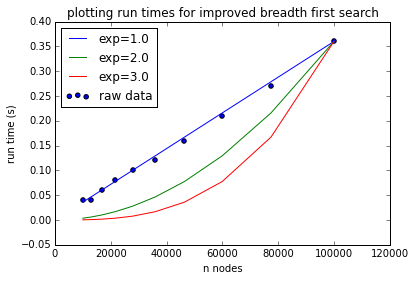

In [63]:
def test_and_plot_complexity(func, low=4, high=5, nsteps=10, k=2, title='', log=True):
    """
    func: bfs function
    low and high are both log of n nodes being tested in the graphs
    nsteps: amount of datapoints
    log: log scale?
    k: number of edges in graphs being tested
    """
    
    times = []
    ns = np.logspace(low, high, nsteps)
    for n in ns:
        n = int(n)
        times.append(test_graph(n, func=func, k =k))   
    
    fit_complexity(ns, times, title=title, log=log)

test_and_plot_complexity(bfs2, log=False, title='plotting run times for improved breadth first search')

The two performance errors were that for each node:
* the list of visited nodes was getting looped through every time - this was solved by marking each node.  This way checking a node happens in constant time rather than in the linear time that it takes to look through the loop.
* the queue was getting looped through every time - this was totally unncessary once the nodes were getting marked as visited.

##Small World Graphs
*  **clustering** is a measure of "cliquishness".  a **clique** is a subset of nodes that are all connected to each other.  there is a clustering coefficent that quantifies the likelihood that two nodes that are connected to the same node are also connected to each other.

* Path Length

regular graphs have high clustering and high path length.  random graphs of the same size have low clustering and low path length.  Neither is good for social networks, which have high clustering and low path length.

**generative model** tries to explain a phenomenon by modeling the process that builds or leads to the phenomenon.

1. Start with a regular graph with n nodes and degree k.
2. Choose a subset of edges in the graph and "rewire" them by replacing them with random edges.  proportion of edges that are rewired is a parameter p, that controls how random the graph is.  if p == 0, the graph is regular.  With p == 1, it is random.

W+S found that small values of p yield graphs with high clustering and low path length.

###Exercise 4.3 
read Watts and Strogatz paper...
1. What process do W+S use to rewire their graphs?
    * loop through every vertices and with prob p, reconnect edge that connects to nearest neighbor to some other random edge.  Duplicate edges forbidden.
    * do same thing with edges connecting vertice to next largest edge.  do this k/2 times.

2. What is the definition of the clustering coefficient C(p)?
    * cliquishness of a typical neighborhood.  Suppose vertex v has $k_v$ neightbors.  At most, $k_v(k_v-1)/2$ edges can exist between neighbors.  $C_v$ is the fraction of those allowable edges that actually exist.  C is the average of $C_v$ over all v.  In a social network, c indicates the extend to which friends of v are also freinds of each other.
3. What is the definition of the average path length L(p)?
    * typical separation between two vertices.  Number of edges in the shortest path between two vertices averaged over all pairs of vertices.
4. What real-world graphs did W+S look at?  What evidence do they present that these graphs have the same structure as the graphs generated by their model.
    * collaboration graph of actors
    * electrical power grid of western US
    * neural network of nematode
    
   the evidence that they use to conclude that these graphs have the same structure as their generative model is that the L values are pretty low but the C values are pretty high.
   
##Exercise 4.4

In [142]:
from RandomGraph import *
from Graph import *
import random
import numpy as np

class SmallWorldGraph(RandomGraph):

    def __init__(self, generate=True, n=20, k=4):
        try:
            err = 'n must be > k'
            assert n > k
            err = 'k must be > ln(n)'
            assert k > np.log(n)
            err = 'ln(n) must be > 1'
            assert np.log(n) > 1
        except AssertionError:
            raise ValueError('illegal starting values for small world graph:' + err)
        
        RandomGraph.__init__(self)
        if generate:
            for i in range(n):
                v = Vertex(i)
    #             v.visited = True
                self.add_vertex(v)
            self.add_regular_edges(k)
    
    def rewire(self, p):
        edges = self.edges()
        vertices = self.vertices()
        for e in edges:
            if random.random() < p:
                v, w = e
                self.remove_edge(e)
                w_new = random.choice(vertices)
                while w_new == v or w_new in self.out_vertices(v):
                    w_new = random.choice(vertices)
                self.add_edge((v, w_new))
                
    def clustering_coefficient(self):
        vertices = self.vertices()
        cs = []
        for v in vertices:
            c = self.local_clustering_coefficient(v)
            cs.append(c)
        
        return np.mean(cs)
    
    def local_clustering_coefficient(self, v, debug=False):
        neighbors = self.out_vertices(v)
        possible = len(neighbors)*(len(neighbors)-1)/2.0
        
        actual = sum(1 for n1 in neighbors
             for n2 in self.out_vertices(n1)
             if n2 in neighbors)
        
        actual = actual/2.0
        if possible == 0:
            return 0
        
        if debug: print 'local cc: ', actual, possible
        return float(actual)/possible

swg = SmallWorldGraph(True, 8, 4)
# show_graph(swg)
swg.rewire(0)
# ShowGraph(swg)
swg.clustering_coefficient()

0.5

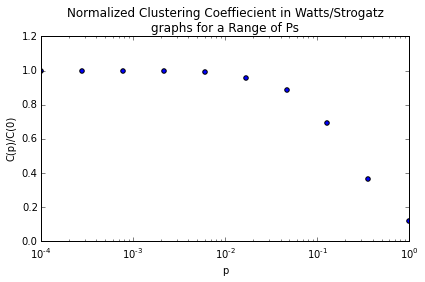

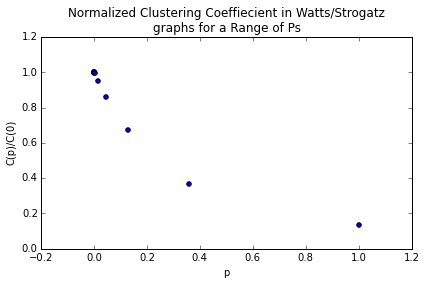

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_clustering_coefficients(steps=10, n=50, k=4, n_trials=10, log=True):
    
    def get_clustering_coefficient(n, k, p):
        swg = SmallWorldGraph(True, n, k)
        swg.rewire(p)
        return swg.clustering_coefficient()
    
    c_0 = get_clustering_coefficient(n, k, 0)

    ps = np.logspace(-4,0,steps)
    cs = []
    for p in ps:
        c = np.mean([get_clustering_coefficient(n, k, p)/c_0 for i in range(n_trials)])
        cs.append(c)
    
    fig, ax = plt.subplots()
    ax.scatter(ps, cs)
    ax.set_xlabel('p')
    ax.set_ylabel('C(p)/C(0)')
    ax.set_title('Normalized Clustering Coeffiecient in Watts/Strogatz\n' +
                 'graphs for a Range of Ps')
    if log:
        ax.set_xscale('log')
        ax.set_xlim((ps[0],ps[-1]))
    fig.tight_layout()
plot_clustering_coefficients(log=True)
plot_clustering_coefficients(log=False)
plt.show()
        

What this shows is that clustering falls of linearly with the probability p untill it becomes pretty sparse for higher values of p.  The paper says something to the tune of, rewirings are not felt locally.

**Dijkstra's algorithm** solves the sinlge source shortest path problem - i.e. it finds the minimum distance from a given "source" node to every other node in the graph.

First, a *simplified version* (all edges same length):
* similar to bfs, except instead of marking nodes as visited, we label them with their distance from the source.
* Initially, nodes are labeld with infinite distance
* Uses queue of discovered, unvisited nodes.


1. Give source node distance 0 and add it to the queue.  Give all other nodes an infinite distance
2. Remove a vertex from the queue and assign its distance to d.  Find the vertices it is connected to.  For each connected vetex with infinite distance, replace the distance with d + 1 and add it to the queue.
3. If queue is not empty, go back to step 2.

##Exercise 4.5

In [99]:
import os

def etime():
    """See how much user and system time this process has used
    so far and return the sum"""
    user, sys, chuser, chsys, real = os.times()
    return user+sys

start = etime()

# put the code you want to measure here

end = etime()
elapsed = end - start
print elapsed

0.0


In [108]:
np.logspace(1.5, 2, 5)

array([  31.6227766 ,   42.16965034,   56.23413252,   74.98942093,  100.        ])

times [0.009999999999990905, 0.009999999999990905, 0.009999999999990905, 0.020000000000010232, 0.01999999999998181] [6.219999999999999, 10.889999999999986, 19.26000000000002, 34.349999999999994, 61.23000000000002]


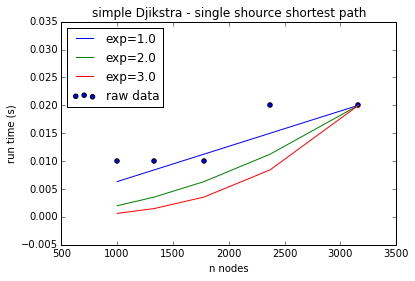

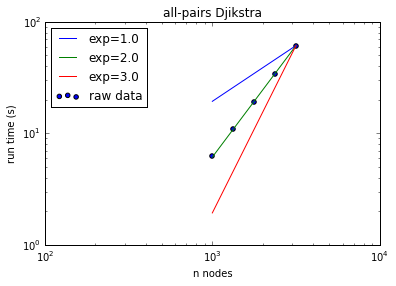

In [147]:
def plot_run_time_djikstra(k=10, low=3, high=3.5, nsteps=5):
    ns = np.logspace(low, high, nsteps)
    times_simple, times_allpairs = [], []
    for n in ns:
        n = int(n)
        swg = SmallWorldGraph(n=n, k=k)
        
        #all_source
        start = etime()
        swg.simple()
        end = etime()
        elapsed = end - start
        times_simple.append(elapsed)
        
        #all_pairs
        start = etime()
        swg.average_path_lengths()
        end = etime()
        elapsed = end - start
        times_allpairs.append(elapsed)
    
    print "times", times_simple, times_allpairs
    fig1, ax1 = plt.subplots()
    fit_complexity(ns, times_simple, log=False, ax=ax1, title='simple Djikstra - single shource shortest path')
    fig, ax2 = plt.subplots()
    fit_complexity(ns, times_allpairs, ax=ax2, title='all-pairs Djikstra')

plot_run_time_djikstra()
# plt.show()
        
        

In [127]:
class Djikstra(object):
    
    def __init__(self, graph):
        self.graph = graph
    
    def simple(self, src=None):
        """
        returns avg path length
        """
        graph = self.graph
        Ls = [] #path lengths 
        
        vertices = graph.vertices()
        for v in vertices:
            v.distance = np.inf
            v.color = 'white'
        if src is None:
            src = vertices[0]
        src.distance = 0
        src.color = 'red'

        # 1.
        queue = [src]

        # 2. (and 3.) 
        while len(queue):
            curr = queue.pop(0)
            for v in graph.out_vertices(curr):
                if v.distance != np.inf:
                    continue
                v.distance = curr.distance + 1
                Ls.append(v.distance)
                queue.append(v)
        
        return np.mean(Ls)
    
    def update_labels(self):
        vertices = self.graph.vertices()
        for v in vertices:
            v.label = '%s, dist=%d' % (v.label, v.distance)
        
    def show(self):
        self.update_labels()
        show_graph(self.graph)
    
    def average_path_lengths(self):
        graph = self.graph
        vertices = graph.vertices()
        
        ls = []
        for v in vertices:
            ls.append(self.simple(v))
        return np.mean(ls)
            
    def all_pairs(self, src=None):
        graph = self.graph
        vertices = graph.vertices()
        
        pairs = [(v1, v2) for v1 in vertices for v2 in vertices if v1 !=v2]
        
        
swg = SmallWorldGraph(True, 20, 4)
swg.rewire(.6)
d = Djikstra(swg)
d.all_pairs()
# d.show()
# d.average_path_lengths()

In [143]:
def _average_path_length(self):
    d = Djikstra(self)
    return d.average_path_lengths()
SmallWorldGraph.average_path_lengths = _average_path_length

def _simple(self, src=None):
    d = Djikstra(self)
    return d.simple(src=src)
SmallWorldGraph.simple = _simple

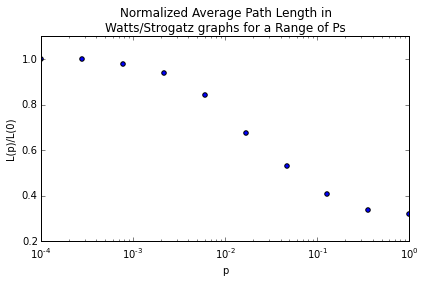

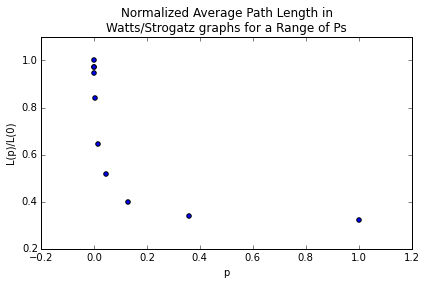

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_average_path_length(steps=10, n=100, k=6, n_trials=10, log=True):
    
    def get_path_length(n, k, p):
        swg = SmallWorldGraph(True, n, k)
        swg.rewire(p)
        d = Djikstra(swg)
        return d.average_path_lengths()
    
    L_0 = get_path_length(n, k, 0)

    ps = np.logspace(-4,0,steps)
    Ls = []
    for p in ps:
        L = np.mean([get_path_length(n, k, p)/L_0 for i in range(n_trials)])
        Ls.append(L)
    
    fig, ax = plt.subplots()
    ax.scatter(ps, Ls)
    ax.set_xlabel('p')
    ax.set_ylabel('L(p)/L(0)')
    ax.set_title('Normalized Average Path Length in\n' +
                 'Watts/Strogatz graphs for a Range of Ps')
    if log:
        ax.set_xscale('log')
        ax.set_xlim((ps[0],ps[-1]))
    fig.tight_layout()
plot_average_path_length()
plot_average_path_length(log=False)
plt.show()
        

What this graph demonstrates is that rewiring quickly lowers the average path length.
##4.6

In [85]:
import math
class NearestNeighbors(SmallWorldGraph):
    
    def __init__(self, n=10, k=1):
        
        SmallWorldGraph.__init__(self)
        
        ## 1. choose random x, y position for all vertices
        for i in range(n):
            v = Vertex(i)
            v.x = random.random() * 100
            v.y = random.random() * 100
            v.dist = np.inf
            self.add_vertex(v)
        
        ## 2. attach egdes to the k closest neighbors
        vertices = self.vertices()
        for v in vertices:
            k_nearest = []
            for v2 in vertices:
                if v == v2: continue
                if len(k_nearest) < k:
                    k_nearest.append(v2)
                    continue
                v2.dist = math.sqrt((v.x - v2.x)**2 + (v.y - v2.y)**2)
                try:
                    curr_max = max(k_nearest, key=lambda k_n: k_n.dist)
                except ValueError:
                    curr_max = v2
                    continue
                
                if v2.dist <= curr_max.dist:
                    k_nearest.remove(curr_max)
                    k_nearest.append(v2)
            
            assert len(k_nearest) == k
            for neighbor in k_nearest:
                self.add_edge((v, neighbor))
        
        self.find_islands()

    def find_islands(self):
        vs = self.vertices()
        conn_leaders = []

        while len(vs):
            self.max_conns = vs[0]
            visited = self.bfs(vs[0], self.store_max_conns)
            for v in visited:
                vs.remove(v)
            conn_leaders.append(self.max_conns)

        for leader in conn_leaders:
            for leader2 in conn_leaders:
                if leader == leader2: continue
                self.add_edge((leader, leader2))

    def store_max_conns(self, v):
        if len(self.out_vertices(v)) > len(self.out_vertices(self.max_conns)):
            self.max_conns = v
            
    def rewire(self, p):
        edges = self.edges()
        vertices = self.vertices()
        for e in edges:
            if random.random() < p:
                v, w = e
                self.remove_edge(e)
                w_new = random.choice(vertices)
                while w_new == v:
                    w_new = random.choice(vertices)
                self.add_edge((v, w_new))
nn = NearestNeighbors(n=40, k=2)
# print nn.is_connected()
ShowGraph(nn)
nn.find_islands()
ShowGraph(nn)
print 'cc', nn.clustering_coefficient()
print 'al', nn.average_path_lengths()
nn.rewire(.4)
ShowGraph(nn)
print 'cc', nn.clustering_coefficient()
print 'al', nn.average_path_lengths()

cc 0.523333333333
al 6.83205128205
cc 0.0916666666667
al 4.26282051282


the right way to do this is a little more complicated.  What I think is happening is that edges are getting removed such that most vertices do not have the right amount of edges, or, in the most recent case, the match of vertices no longer exists.

What I am going to do about this is build up a sorted queue for each vertex.  Then I am going to loop through each vertex again and add the k nearest edges.

[1.0742612460003769, 1.0597794717359936, 1.0708780350084701, 1.0703975098243874, 1.0457227555053645, 0.95989924655932568, 0.9566299642386602, 0.70548497396323495, 0.33903475751301843, 0.052518978605935143] [17.233001956322116, 17.761089152393502, 16.811474428075222, 15.808442282355333, 14.98015730426798, 13.199584780612451, 11.957320237952652, 9.293608016928177, nan, nan]


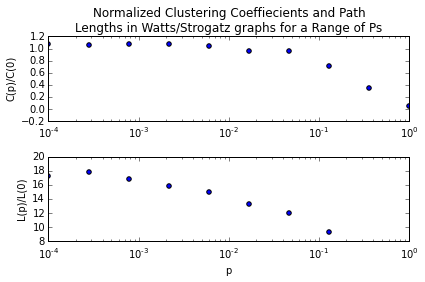

In [130]:
def plot_cc_and_pl(generator=NearestNeighbors, steps=10, n=100, k=3, n_trials=10, log=True):
    
    def graph_func(n, k, p):
        swg = generator(n=n, k=k)
        swg.rewire(p)
        return swg.clustering_coefficient(), swg.average_path_lengths()
    
    c_0s, L_0s = [],[]
    for i in range(n_trials):
        c_0, L_0 = graph_func(n, k, 0)
        c_0s.append(c_0)
        L_0s.append(L_0)
    c_0, L_0 = np.mean(c_0), np.mean(L_0)
    
    ps = np.logspace(-4,0,steps)
    cs, Ls = [], []
    for p in ps:
        res = [graph_func(n, k, p)/c_0 for i in range(n_trials)]
        c, L = zip(*res)
        cs.append(np.mean(c))
        Ls.append(np.mean(L))
    print cs, Ls
    
    fig, ax = plt.subplots(2,1)
    ax[0].scatter(ps, cs, label='C(p)/C(0)')
    ax[0].set_ylabel('C(p)/C(0)')
    ax[1].scatter(ps, Ls, label='L(p)/L(0)')
    ax[1].set_ylabel('L(p)/L(0)')
    ax[1].set_xlabel('p')
    
    ax[0].set_title('Normalized Clustering Coeffiecients and Path\n'  +
                    'Lengths in Watts/Strogatz graphs for a Range of Ps')
    if log:
        for x in ax:
            x.set_xscale('log')
            x.set_xlim((ps[0],ps[-1]))
    fig.tight_layout()

def graph_func(n, k, p):
    nn = NearestNeighbors(n, k)
    nn.rewire(p)
    return nn.clustering_coefficient(), nn.average_path_lengths()

plot_cc_and_pl()
plt.show()

In [69]:
np.mean((2,4))

3.0